In [691]:
#Import dependant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [692]:
#Loading Dataset from given txt file
df = pd.read_csv("cluster_data.txt", sep="\t", header=None, names=["n", "x", "y"])

#Drop first column
del df["n"]

In [693]:
#User Axis limit for plot
x_min_lim = -1
x_max_lim = 5
y_min_lim = -2
y_max_lim = 2
k_means = 5

In [694]:
# Generate centroids for each cluster at random positions intially
np.random.seed(800)
k = k_means

centre = {
    i + 1: [np.random.randint(x_min_lim, x_max_lim), np.random.randint(y_min_lim, y_max_lim)]
    for i in range(k)
}

Text(0, 0.5, 'Width')

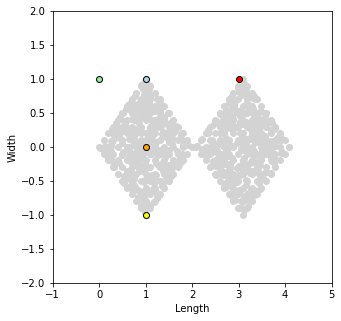

In [695]:
#Setup colors for plot 
colimap = {1: 'lightblue', 2: 'lightgreen', 3: 'red',4: 'orange',5: 'yellow'}
colmap = {1: 'lightblue', 2: 'lightgreen', 3: 'red',4: 'orange', 5: 'yellow'}


#Plot all points as a plot
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='lightgray')
plt.ylim(y_min_lim, y_max_lim)
plt.xlim(x_min_lim, x_max_lim)


#Plot initial centroids in addition to data points of plot
for i in centre.keys():
    plt.scatter(*centre[i], color=colmap[i],edgecolor='black')


#labels
plt.xlabel("Length")
plt.ylabel("Width")

In [696]:
#Define function to assign point to nearest centroid
def Closest(df, centre):
    for i in centre.keys():
  
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centre[i][0]) ** 2
                + (df['y'] - centre[i][1]) ** 2
            )
        )
    centre = ['distance_from_{}'.format(i) for i in centre.keys()]
    df['near'] = df.loc[:, centre].idxmin(axis=1)
    df['near'] = df['near'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['near'].map(lambda x: colmap[x])
    return df

Text(0, 0.5, 'Width')

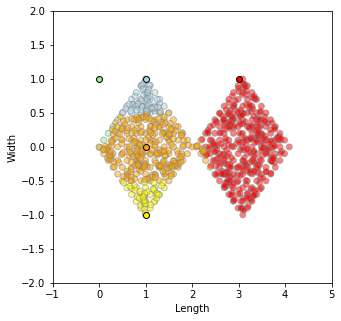

In [697]:
#check distance of point with all initial centres and assign cluster of centroid closer to it
df = Closest(df, centre)


fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='gray')

for i in centre.keys():
    plt.scatter(*centre[i], color=colmap[i],edgecolor='black')

#labels    
plt.xlim(x_min_lim, x_max_lim)
plt.ylim(y_min_lim, y_max_lim)
plt.xlabel("Length")
plt.ylabel("Width")

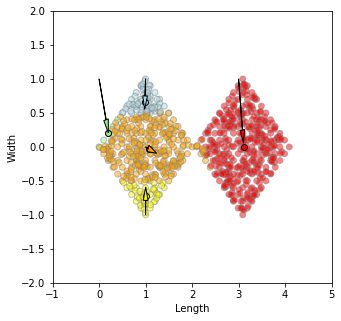

In [698]:
# After assigning clusters for points based on nearest centre, new centroid values are created and points are assigned to nearest cluster again

old_centre = copy.deepcopy(centre)

def update(k):
    for i in centre.keys():
        centre[i][0] = np.mean(df[df['near'] == i]['x'])
        centre[i][1] = np.mean(df[df['near'] == i]['y'])
    return k

centre = update(centre)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='gray')


for i in centre.keys():
    plt.scatter(*centre[i], color=colmap[i],edgecolor='black')


#labels
plt.xlim(x_min_lim, x_max_lim)
plt.ylim(y_min_lim, y_max_lim)
plt.xlabel("Length")
plt.ylabel("Width")

for i in old_centre.keys():
    old_x = old_centre[i][0]
    old_y = old_centre[i][1]
    dx = (centre[i][0] - old_centre[i][0]) * 0.75
    dy = (centre[i][1] - old_centre[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=.1, head_length=.2, fc=colmap[i], ec='black')


Text(0, 0.5, 'Width')

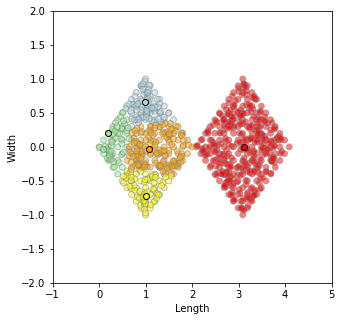

In [699]:
# Repeat Closest Stage

df = Closest(df, centre)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='gray')

for i in centre.keys():
    plt.scatter(*centre[i], color=colmap[i],edgecolor='black')

# Assign labels and limits
plt.xlim(x_min_lim, x_max_lim)
plt.ylim(y_min_lim, y_max_lim)
plt.xlabel("Length")
plt.ylabel("Width")

In [700]:
# Repeat creating new centroids and assign points to nearest centroid until all assigned clusters don't change
while True:
    near_centre = df['near'].copy(deep=True)
    centre = update(centre)
    df = Closest(df, centre)
    if near_centre.equals(df['near']):
        break


{1: 'lightblue', 2: 'lightgreen', 3: 'red', 4: 'orange', 5: 'yellow'}


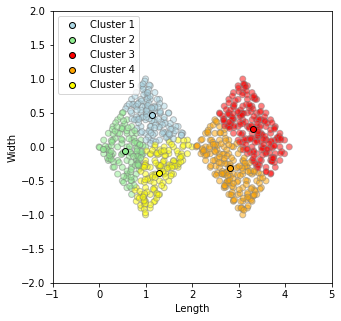

In [701]:
#
fig = plt.figure(figsize=(5, 5))
ax = plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='gray')
for i in centre.keys():
    plt.scatter(*centre[i], color=colmap[i], label = 'Cluster ' + str(i), edgecolor='black')

print(colmap)

#labels
plt.xlabel("Length")
plt.ylabel("Width")
plt.xlim(x_min_lim, x_max_lim)
plt.ylim(y_min_lim, y_max_lim)

plt.legend()
